# 1. 들어가며

## 학습 목표
* 시계열 데이터의 특성과 안정적(Stationary) 시계열의 개념을 이해할 수 있습니다.
* ARIMA 모델을 구성하는 AR, MA, Diffencing의 개념을 이해하고 간단한 시계열 데이터에 적용할 수 있습니다.
* 실제 주식 데이터에 ARIMA를 적용해서 예측 정확도를 확인할 수 있습니다.

# 2. 시계열 예측이란(1) 미래를 예측한다는 것은 가능할까?
남들보다 미래의 정보를 단 한 시간 만이라도 먼저 알 수 있다면 어떨까요? 타임머신 같은 공상과학 영화 시나리오를 생각하지 않더라도, 분초 단위로 거래 가격이 변동하는 주식시장이나 외환 거래 시장에서 이런 능력이 얼마나 큰 수익을 가져다줄지는 자명합니다. 꼭 돈 버는 문제를 생각지 않더라도, 각종 산업현장에서 혹시 모를 위험을 미리 감지해서 대비할 수만 있다면 얼마나 유용할까요?


### 예측 시나리오 생각해보기
* 지금까지의 주가 변화를 바탕으로 다음 주가 변동 예측
* 특정 지역의 기후데이터를 바탕으로 냉리의 온도 변화 예측
* 공장 센터 데이터 변화 이력을 토대로 이상 발생 예측
    
위의 공통점은 예측의 근거가 되는 시계열(Time-Series) 데이터가 있다는것,    
시계열이란 시간 순서대로 발생한 데이터의 수열    
굳이 간단한 수식의 형태를 빌리자면 아래와 같이 표현할 수 있다.    
    
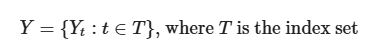
    


일정 시간 간격으로 발생한 데이터일 때가 많지만 꼭 그래야만 하는 것은 아닙니다. 매일의 주식 거래 가격을 날짜-가격 형태로 날짜순으로 모아둔 데이터가 있다면 훌륭한 시계열 데이터가 될 것입니다. 이때 날짜가 인덱스(index) 역할을 하게 됩니다.    
    
그렇다면 여기서 의문이 생깁니다. 특정 주식의 오늘까지의 매일 가격 변동 시계열 데이터가 수년 치 쌓여 있다고 칩시다. 그럼 우리는 이 데이터를 토대로 내일의 이 주식 가격이 얼마가 될지, 심지어 오를지 내릴지조차, 예측이 가능한 것일까요? 결론적으로 말하자면, 미래 예측은 불가능한 것입니다. 그럼에도 불구하고 미래의 데이터를 예측하려 든다면 적어도 다음 두 가지의 전제가 필요합니다.    
    
> 1. 과거의 데이터에 일정한 패턴이 발견된다.    
> 2. 과거의 패턴은 미래에도 동일하게 반복될 것이다.    
     
위 두 가지 전제를 한 문장으로 줄이면 다음과 같습니다.     
    
> 안정적(Stationary) 데이터에 대해서만 미래 예측이 가능하다.    
    
여기서 안정적(Stationary)이다는 것은 시계열 데이터의 통계적 특성이 변하지 않는다는 뜻입니다. 좀 더 직관적으로 표현하자면, 시계열 데이터를 만들어내는 시간의 변화에 무관하게 일정한 프로세스가 존재한다는 뜻입니다. 매우 불규칙해 보이는 매일의 날씨 변화에도 불구하고 연 단위 기후 변화의 일정한 패턴이 유지된다면, 지구상의 일정한 기후변동 프로세스가 만들어 내는 안정성(stationarity)에 의해 내일의 기온은 어느 정도 오차 범위 내에서 예측이 가능할 것입니다.

그렇다면 다음 기사를 읽어보고 나서 다음 질문들에 답해 봅시다.    
그림자로 원유재고 알아낸다 : https://news.einfomax.co.kr/news/articleView.html?idxno=4082410


시계열 데이터 분석은 완벽한 미래 예측을 보장하지는 않습니다.    
어떤 예측하지 못한 `외부적 변수`에 의해 시계열 데이터 분석의 전제가 되는 `안정성(stationarity)`이 훼손될 여지가 있기 때문입니다.    
그럼에도 불구하고, 시계열 데이터 분석은 프로세스 내재적인 시간적 변화를 묘사하는데 아주 훌륭한 성능을 보입니다.    
    
그럼 다음 스텝에서 시계열의 `안정적(Stationary)`인 특성이란 무엇인지 좀 더 구체적으로 살펴보겠습니다.

# 3. 시계열 예측이란(2) Stationary한 시계열 데이터
> (참고) 'Stationary Time-Series'와 'Stationarity'를 많은 문헌에서 '정상 시계열', '정상성'이라는 단어로 번역하기도 합니다. 본 노드에서는 직관적 이해에 보다 도움이 되는 '안정적 시계열', '안정성'이라는 번역을 채택하였습니다. 용어 활용과 관련하여 참고해 주세요.
    
미래의 데이터를 예측하기 위해서는 그 데이터는 안정적(Stationary) 이어야하고, 이는 '시계열 데이터의 통계적 특성이 변하지 않는다'를 뜻한다고 했습니다. 조금만 더 구체적으로 들어가보죠.    
    
여기서 말하는 시간이 흘러도 일정해야하는 통계적 특성은 다음 세 가지입니다.    
1. 평균
2. 분산
3. 공분산
    
그런데 위 통계량을 흐르는 시간 속에서 의미있게 가져가려면, 구간에 따른 통계치를 봐야합니다. 즉, 위 세 가지 대신 다음 세 가지 통계치가 일정해야 합니다.
1. 이동평균
2. 이동표준편차
3. 자기공분산

#### 통계치 개념 정리
* 평균 : 말그대로 평균이며 모든 데이터를 더해 그 개수(n)로 나눈 값
* 분산 : 데이터들이 평균에서 얼마나 떨어져 있는지 가능하기 위한 지표
* 공분산 : 변수가 두 개 일때의 분산으로 각 변수의 분포가 서로 얼마나 관련이 있는지 수치적으로 표현한 것, 각 변수의 평균에서의 편차를 곱한 것의 평균
* 상관관계 : 공분산을 각 분산으로 다시 나눠 공분산을 `(01,1)`범위로 스테일링 한것, 두 변수가 양의 관계에 가까울 수록 1, 음의 관계에 가까울수록 -1, 무관할수록 0에 가깝다.
* 이동평균 : 시계열 데이터에서 특정 개수 `(d)`의 데이터를 시점 `(t)`을 이동하며 계산하는 평균
* 이동표준편차 : 시계열 데이터에서 특정 개수`(d)`의 데이터를 시점`(t)`을 이동하며 계산하는 표준편차 (표준편차는 분산에 제곱근을 씌운 값)
* 자기공분산 : 자기공분산이란 일정 시차`(h)`를 둔 자기 자신과의 공분산
* 자기상관계수 : 일정 시차`(h)`를 둔 자기 자신과의 상관계수

이제 예시를 한 번 들어보겠습니다. 우리는 과거 몇 개의 데이터를 통해 다음 데이터를 예측해 보려고 합니다.
> 예시) 직전 5년 치 판매량 X(t-4), X(t-3), X(t-2), X(t-1), X(t)를 가지고 X(t+1)이 얼마일지 예측해보자.    
    
이 예측이 의미가 있으려면 중요한 것은 t에 무관하게 이 예측이 맞아떨어져야 한다는 점입니다.    
     
t=2010일 때의 데이터를 가지고 X(2011)을 정확하게 예측하는 모델이라면 이 모델에 t=2020을 대입해도 이 모델이 X(2021)을 정확하게 예측할 수 있어야 한다는 것입니다.     
     
그러려면 t에 무관하게 X(t-4), X(t-3), X(t-2), X(t-1), X(t)의 평균과 분산이 일정 범위 안에 있어야 합니다. (= 이동평균과 이동표준편차가 일정합니다.)     
     
또한 X(t-h)와 X(t)는 t에 무관하게 h에 대해서만 달라지는 일정한 상관도를 가져야 합니다. (= 자기공분산이 일정합니다.)     
     
그렇지 않으면 우리의 시계열 예측은 t에 따라 달라지는, 그때그때 달라요 예측이 됩니다. 이것은 과거의 패턴이 미래에도 반복될 것이다 라는 시계열 예측의 대전제를 무너뜨립니다.     

# 4. 시계열 예측이란(3) 시계열 데이터 사례분석
#### 잘 알려진 작은 시계열 데이터를 토대로 시계열 데이터의 안정성의 개념을 시각적으로 따져보기


## 시계열(Time Series) 생성

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

print('슝=3')

슝=3


In [4]:
dataset_filepath = r'C:\Users\nini\Desktop\TimeSeriese_Learning_training\training\data\daily-min-temperatures.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


Pandas에서 제공하는 Series라는 자료구조가 있었던 것을 기억하시나요? 오늘 다루게 될 시계열(Time Series)이란 것도 결국 시간 컬럼을 index로 하는 Series로 표현됩니다. 우리가 읽어 들인 데이터 파일은 Pandas를 통해 2개의 컬럼을 가진 DataFrame으로 변환되었습니다. 이것은 아직 시계열의 데이터 구조는 아닙니다.

위의 DataFrame에서 Date 컬럼을 index로 삼아 시계열을 생성해 봅시다.

In [5]:
# 이번에는 Date를 index_col로 지정해 주었습니다. 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [6]:
# 시간 컬럼이 index가 되었지만 아직도 type은 DataFrame으로 나옵니다. 우리가 찾는 시계열은 바로 여기 있습니다.
ts1 = df['Temp']  # 우선은 데이터 확인용이니 time series 의 이니셜을 따서 'ts'라고 이름 붙여줍시다!
print(type(ts1))
ts1.head()

<class 'pandas.core.series.Series'>


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

DataFrame인 df와 Series인 df['Temp']는 index 구조가 동일하므로 Numpy, Pandas, Matplotlib 등 많은 라이브러리들이 호환해서 지원해 줍니다.     
하지만 그렇지 않은 경우도 간혹 발생하므로 여기서는 명확하게 Series 객체를 가지고 진행하도록 하겠습니다.

## 시계열 안정성의 정성적 분석
이제 시계열이 준비되었으므로 시각화를 통해 안정성(Stationarity) 여부를 확인해 보겠습니다.

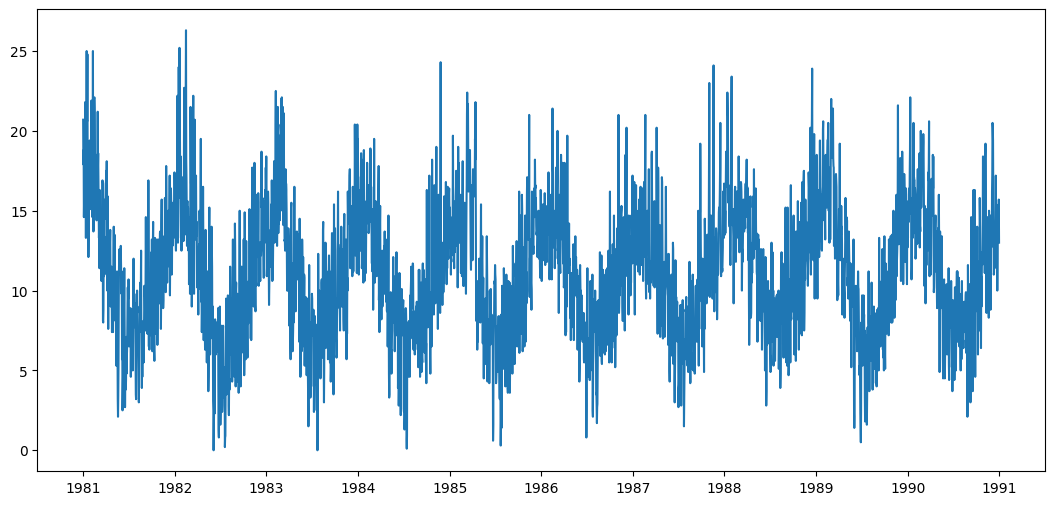

In [7]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts1)

In [8]:
ts1[ts1.isna()]  # 시계열(Time Series)에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Temp, dtype: float64)

행히 이 데이터에는 결측치가 없습니다.     
하지만 혹시 결측치가 있다면 조치가 필요합니다.     
NaN이 들어있는 데이터는 통계분석 시에 많은 오류를 일으킬뿐더러 분석 결과에도 악영향을 미칠 것입니다.     
     
만약 결측치가 있다면, 두 가지 방법으로 결측치를 처리해 줄 수 있습니다.     
     
1. 결측치가 있는 데이터를 모두 삭제(drop)     
2. 결측치 양옆의 값들을 이용해서 적절히 보간(interpolate)하여 대입     
    ex) 2와 4 사이 데이터가 NaN이라면 이 값을 3으로 채우는 방식     
     
이번 경우라면 시간을 index로 가지는 시계열 데이터이므로 삭제하는 것보다는 보간하는 방법을 선택하겠습니다.     
     
Pandas에서 결측치 보간을 처리하는 메서드는 다음과 같습니다. 상세한 설명은 공식 문서를 참고해 주세요.     
공식문서 : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html

Series([], Name: Temp, dtype: float64)


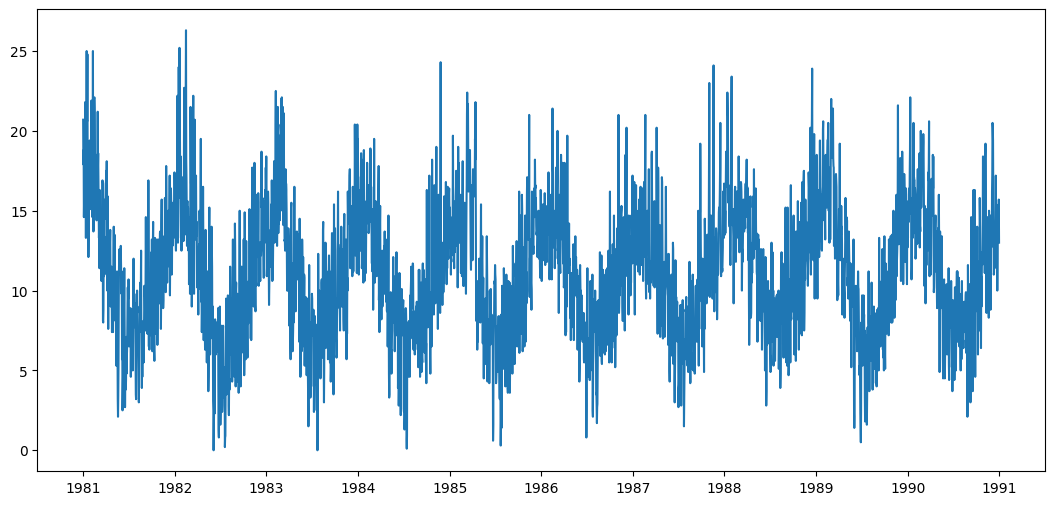

In [9]:
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
ts1=ts1.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인합니다.
print(ts1[ts1.isna()])

# 다시 그래프를 확인해봅시다!
plt.plot(ts1)

어떻습니까? 시간 추이에 따라 일정한 평균, 분산, 자기공분산의 패턴이 나타나는 것 같습니까? 직관적으로 그래 보이긴 합니다만, 시계열 데이터의 통계적 특성을 좀 더 명료하게 시각화해 보겠습니다.    
    
아래는 일정 시간 내 구간 통계치(Rolling Statistics)를 시각화해 보는 함수입니다.    
    
현재 타임 스텝 부터 window에 주어진 타임 스텝 이전 사이    
    
1. 구간의 평균(rolling mean, 이동평균)과
2. 구간의 표준편차(rolling std, 이동표준편차)를
    
원본 시계열과 함께 시각화해 보면 좀 더 뚜렷한 경향성을 확인할 수 있을 것입니다.    
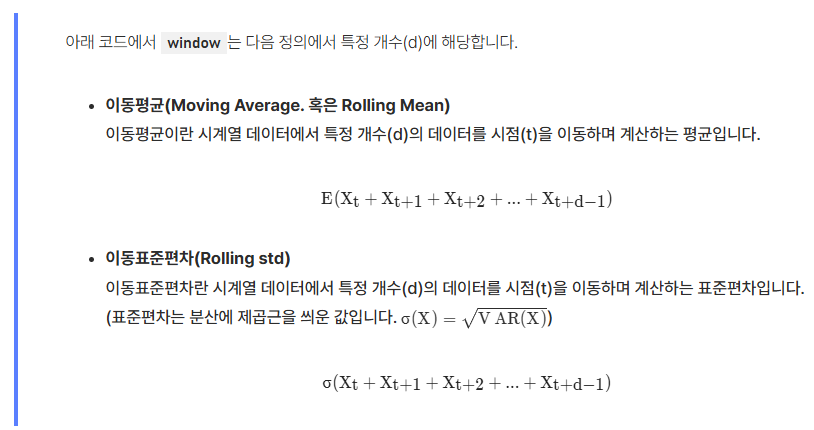

In [10]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


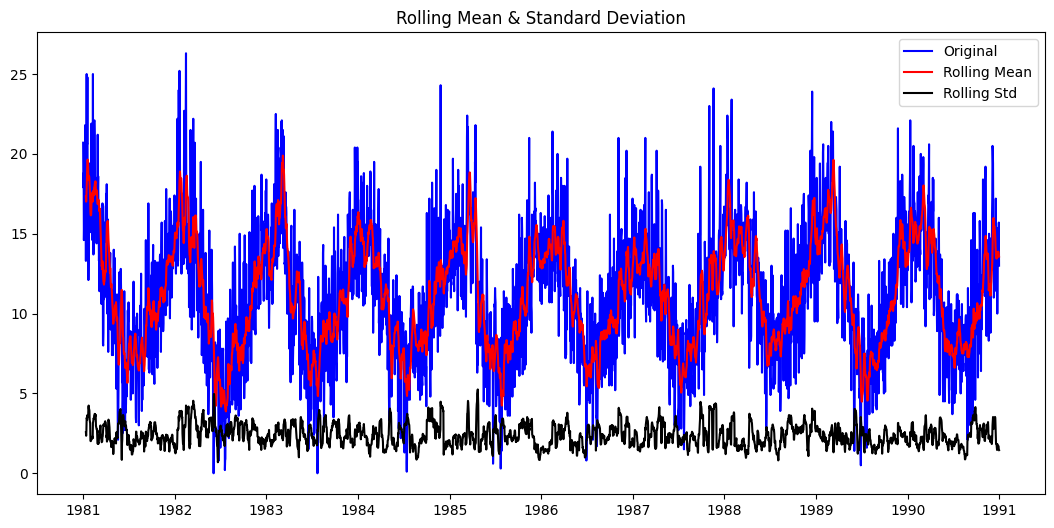

In [11]:
plot_rolling_statistics(ts1, window=12)

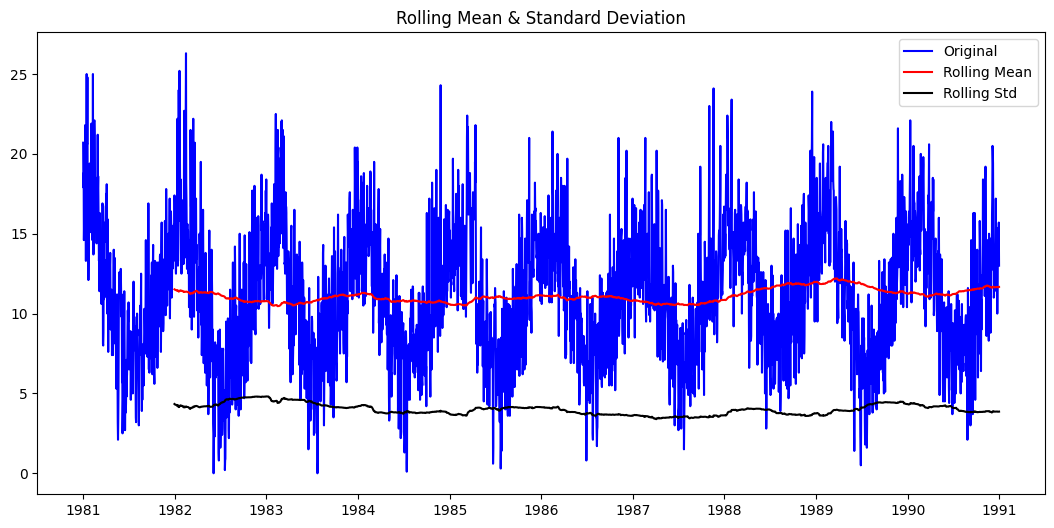

In [12]:
plot_rolling_statistics(ts1, window=365)

이 시계열 데이터가 안정적이라고 명확하게 결론을 내릴 수 있을까요? 시각화한 결과만 놓고 보면 그렇다고 말할 수도 있겠습니다만,     
명확하게 단정 지으려면 좀 더 통계적인 접근이 필요할 것입니다. 그건 다음 스텝에서 다루기로 하고, 이번에는 다른 시계열 데이터의 패턴과 비교해 보면 어떨까요?

## 다른 데이터에 대해서도 비교해 보자.
이번에는 International airline passengers 데이터셋입니다. 월별 항공 승객 수(천명 단위)의 시계열 데이터인데     
기온 변화 데이터셋과는 좀 다른 패턴이 나타나지 않을까요? 위와 동일한 방법으로 분석해 보겠습니다.

In [14]:
dataset_filepath = r'C:\Users\nini\Desktop\TimeSeriese_Learning_training\training\data\airline-passengers.csv' 
df = pd.read_csv(dataset_filepath, index_col='Month', parse_dates=True).fillna(0)  
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


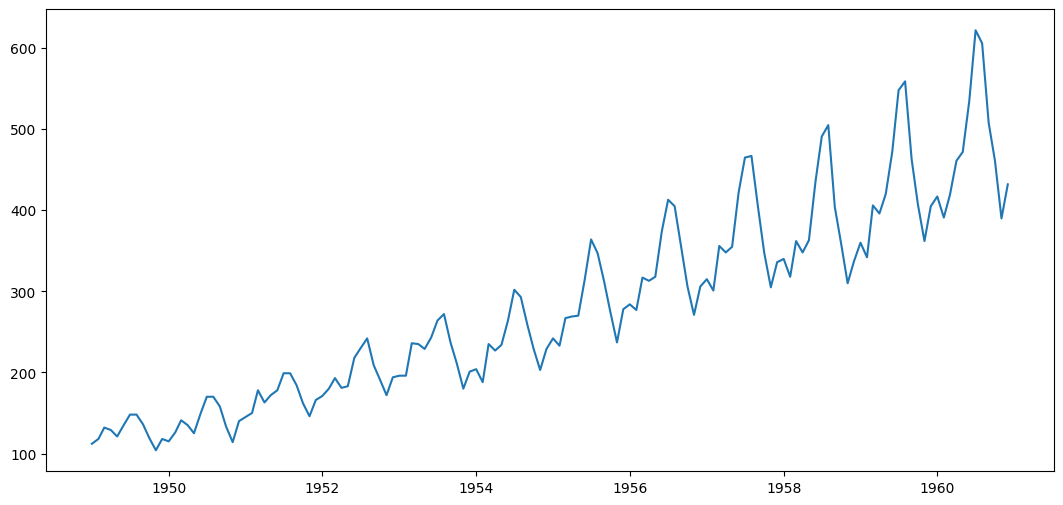

In [15]:
ts2 = df['Passengers']
plt.plot(ts2)

직관적으로 봐도 온도 변화 데이터셋과는 다른 패턴이 보입니다. 시간의 추이에 따라 시계열의 평균과 분산이 지속적으로 커지는 패턴을 보입니다. rolling statistics를 추가해서 시각화해 보겠습니다.

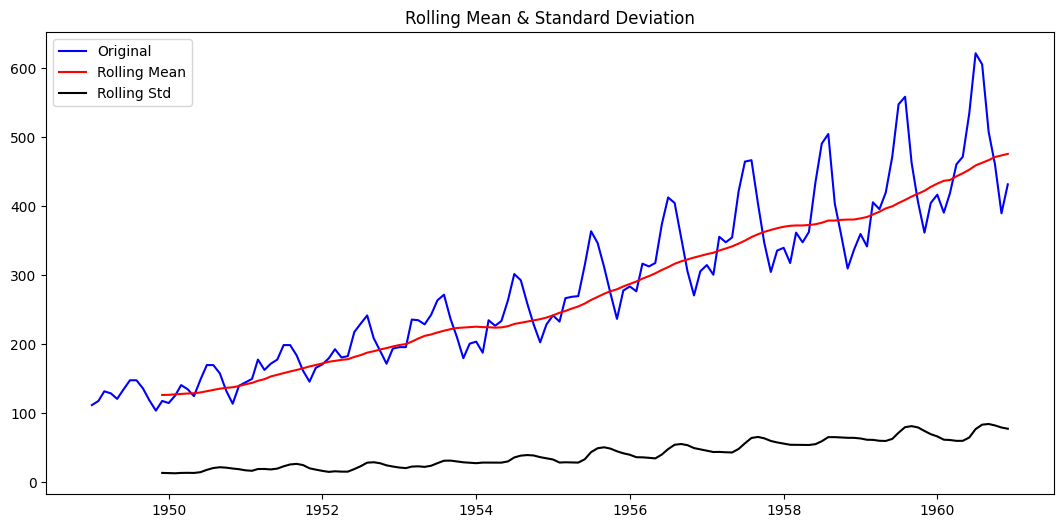

In [17]:
plot_rolling_statistics(ts2, window=12)

이렇게 시간의 추이에 따라 평균과 분산이 증가하는 패턴을 보인다면 이 시계열 데이터는 적어도 안정적이진 않다고 정성적인 결론을 내려볼 수 있을 것 같습니다. 그렇다면 이런 시계열 데이터에 대해서는 시계열 예측을 시도할 수 없는 것일까요? 그렇다면 이번 노드는 너무 재미가 없겠지요?    
    
이후 스텝들에는 이런 불안정적(Non-Stationary) 시계열 데이터에 대한 시계열 분석 기법을 다루어 볼 것입니다.    
    
위와 같이 우리는 시계열 데이터의 안정성을 시각화 방법을 통해 정성적으로 분석해 보았습니다. 이것은 시계열 데이터를 다루는 가장 기본적인 접근법이라 할 수 있습니다.    
    
하지만 시계열 데이터의 안정성을 평가하는 데는 보다 정량적인 방법이 있습니다. 다음 스텝에서 그 방법을 알아보도록 하겠습니다.    

# 5. 시계열 예측이란(4) Stationary 여부를 체크하는 통계적 방법

### Augmented Dickey-Fuller Test
이번 스텝에서는 Augmented Dickey-Fuller Test(ADF Test) 라는 시계열 데이터의 안정성(stationary)을 테스트하는 통계적 방법을 소개하려고 합니다.    
이 테스트는    

> 1. 주어진 시계열 데이터가 안정적이지 않다라는 귀무가설(Null Hypothesis)를 세운 후,
> 2. 통계적 가설 검정 과정을 통해 이 귀무가설이 기각될 경우에
> 3. 이 시계열 데이터가 안정적이다라는 대립가설(Alternative Hypothesis)을 채택한다
    
는 내용입니다.    
        
귀무가설, 대립가설, p-value 이란?    
    
우리가 일반적으로 생각하는 가설은 아마 다음과 같을 수 있습니다. “지구는 둥글 것이다." 또는 “태양이 지구를 돌 것이다.” 하지만 통계적 가설 검정은 어떠한 큰 이론을 제안하는 가설이 아닙니다. 통계에서 가설은 우리가 알고 싶어 하는 “어떤 모집단의 모수(예: 평균, 분산, 등)에 대한 잠정적인 주장"입니다. 따라서 통계적 가설은 앞서 예를 든 가설들과는 다르게 일정한 형식을 따라야 합니다.    
    
그 형식이 바로 “ 귀무가설(Null hypothesis:H0)” 과 “ 대립가설(Alternative hypothesis:H1)” 입니다. 통계적 가설 검정을 하려면 우선 두 가지 형식적 가설 (귀무가설 과 대립가설)을 설정해야 합니다. 그리고 어떤 가설을 채택할지를 확률적으로 따져보고 둘 중 하나를 채택합니다. 그러면 귀무가설은 무엇이고 대립가설은 무엇일까요?    
    
귀무 가설은 통계학에서 처음부터 버릴 것을 예상하는 가설이다. 차이가 없거나 의미있는 차이가 없는 경우의 가설이며 이것이 맞거나 맞지 않다는 통계학적 증거를 통해 증명하려는 가설입니다. 쉽게 말하면 “모집단의 모수는 00와 같다.” 또는 “ 모집단의 모수는 00와 차이가 없다.” 라고 가정하는 것을 말합니다. 예를 들면 1) 만약 전국 남학생의 평균 키가 170cm라는 주장을 통계적으로 검정한다면, 이에 대한 귀무 가설은 “전국 남학생의 평균 키는 170cm과 같다.(또는 차이가 없다.)”가 될 것입니다. 2)제약 회사에서 개발한 백신의 효과를 검정한다면, 귀무가설은 “개발한 백신은 효과가 없다.(또는 차이가 없다).” 가 됩니다. 즉 귀무가설은 “~와 차이가 없다.” “~의 효과가 없다.” “~와 같다.” 라는 형식으로 설정된다는 것을 알 수 있습니다.    
    
대립가설의 정의는 “귀무가설이 거짓이라면 대안적으로 참이 되는 가설" 입니다. 쉽게 설명하면 “귀무가설이 틀렸다고 판단했을 때(기각되었을 때), 대안적으로 선택하는(채택되는) 가설"을 말합니다. 다시 예로 설명드리면 대립가설은 “모집단의 모수는 00와 다르다.” 또는 “ 모집단의 모수는 00와 차이가 있다.” 라고 가정하는 것을 말합니다. 예를 들면 1) 만약 전국 남학생의 평균 키가 170cm라는 주장을 통계적으로 검정한다면, 이에 대한 대립 가설은 “전국 남학생의 평균 키는 170cm와 다르다.(또는 차이가 있다.)”가 될 것이고, 2)제약 회사에서 개발한 백신의 효과를 검정한다면, 대립가설은 “개발한 백신은 효과가 있다.(또는 차이가 있다).” 가 됩니다. 즉 대립가설은 “~와 차이가 있다.” “~의 효과는 있다.” “~와 다르다.” 라는 형식으로 설정된다는 것을 알 수 있습니다.    
    
p-value 정의는 “귀무가설이 참이라고 가정했을 때, 표본으로 얻어지는 통계치(예: 표본 평균)가 나타날 확률" 입니다. p값이 낮다는 것은 귀무가설이 참이라는 가정 하에서 표본을 추출했을 때, 이런 표본 평균이 관측될 확률이 낮다는 것을 뜻합니다. 즉 p 값이 매우 낮으면, 이러한 표본 통계량은 우연히 나타나기 어려운 케이스이기 때문에, 우리는 귀무가설을 채택하지 않고(기각하고), 대안적인 가설, 즉 대립가설을 채택하게 됩니다.

이미 여기까지의 설명만으로도 머리가 굳어버리는 느낌을 받으실 수도 있을 것 같습니다. 시계열 분석은 탄탄한 통계학적 기반에 입각한 만큼 제대로 이해하기 위해서는 전문적인 훈련이 필요합니다.    
    
그래서 ADF Test의 세부 알고리즘을 간단히 보고😉, statsmodels 패키지에서 제공하는 adfuller 메서드를 이용해 손쉽게 ADF Test의 결과를 이용할 것입니다. 🤗

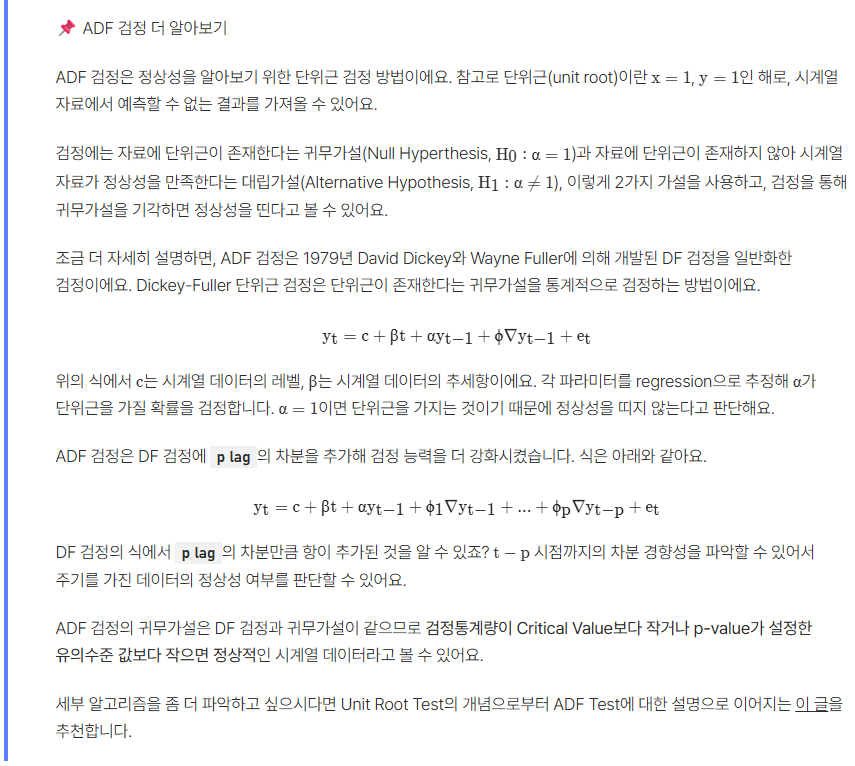

그리고 통계적 가설 검정의 기본 개념을 이루는 p-value 등의 용어에 대해서는 한 번쯤 짚고 넘어가는 것이 이후 과정의 이해를 도울 것이라고 판단됩니다. 다음 링크의 글들을 읽고 질문에 답해 보세요.    
    
유의확률 - 위키백과 : https://ko.wikipedia.org/wiki/%EC%9C%A0%EC%9D%98_%ED%99%95%EB%A5%A0

### statsmodels 패키지와 adfuller 메서드

statsmodels 패키지는 R에서 제공하는 통계검정, 시계열분석 등의 기능을 파이썬에서도 이용할 수 있도록 하는 강력한 통계 패키지입니다. 이번 노드에서는 statsmodels 패키지의 기능을 자주 활용하게 될 것입니다.    
    
아래는 statsmodels 패키지에서 제공하는 adfuller 메서드를 이용해 주어진 timeseries에 대한 Augmented Dickey-Fuller Test를 수행하는 코드 입니다.    
    
클라우드 실습환경에는 이미 statsmodels 패키지가 설치돼 있습니다!    
아래 코드를 바로 실행해 봅시다.    

In [18]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('슝=3')

슝=3


In [19]:
# 그럼 이전 스텝에서 정성적으로 분석해 보았던 두 시계열(Time Series)에 대한 Augmented Dickey-Fuller Test를 수행해 봅시다.
augmented_dickey_fuller_test(ts1)

Results of Dickey-Fuller Test:
Test Statistic                   -4.444805
p-value                           0.000247
#Lags Used                       20.000000
Number of Observations Used    3629.000000
Critical Value (1%)              -3.432153
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64


ts1(Daily Minimum Temperatures in Melbourne)시계열이 안정적이지 않다는 귀무가설은 p-value가 거의 0에 가깝게 나타났습니다.    
     
따라서 이 귀무가설은 기각되고, 이 시계열은 안정적 시계열이라는 대립가설이 채택됩니다.

In [20]:
augmented_dickey_fuller_test(ts2)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


ts2(International airline passengers) 시계열이 안정적이지 않다는 귀무가설은 p-value가 거의 1에 가깝게 나타났습니다.    
p-value가 1에 가깝다는 것이 이 귀무가설(주어진 시계열 데이터가 안정적이지 않다.) 이 옳다는 직접적인 증거는 아닙니다.    
하지만 이 귀무가설을 기각할 수는 없게 되었으므로 이 시계열이 안정적인 시계열이라고 말할 수는 없습니다.

# 6. 시계열 예측의 기본 아이디어 : Stationary하게 만들 방법은 없을까?

이제 우리는 위에서 안정적이라고 말할 수 없게 된 International airline passengers 시계열을 조금 더 분석해 보겠습니다. 이전 스텝에서도 언급했듯, 안정적이지 않은 시계열을 분석하려면 이것을 안정적인 시계열로 바꾸어 내야 합니다. 이것이 어떻게 가능할까요?

크게 두 가지가 있습니다.

> 1. 정성적인 분석을 통해 보다 안정적(stationary)인 특성을 가지도록 기존의 시계열 데이터를 가공/변형하는 시도
> 2. 시계열 분해(Time series decomposition) 기법을 적용

## 1. 보다 Stationary한 시계열로 가공해 가기

### 1-1. 로그함수 변환
가장 먼저 고려해 볼 수 있는 것은 시간 추이에 따라 분산이 점점 커지고 있다는 점입니다.     
시계열이 이런 특성을 보일 경우에는 로그함수로 변환을 해주는 것이 도움이 됩니다.

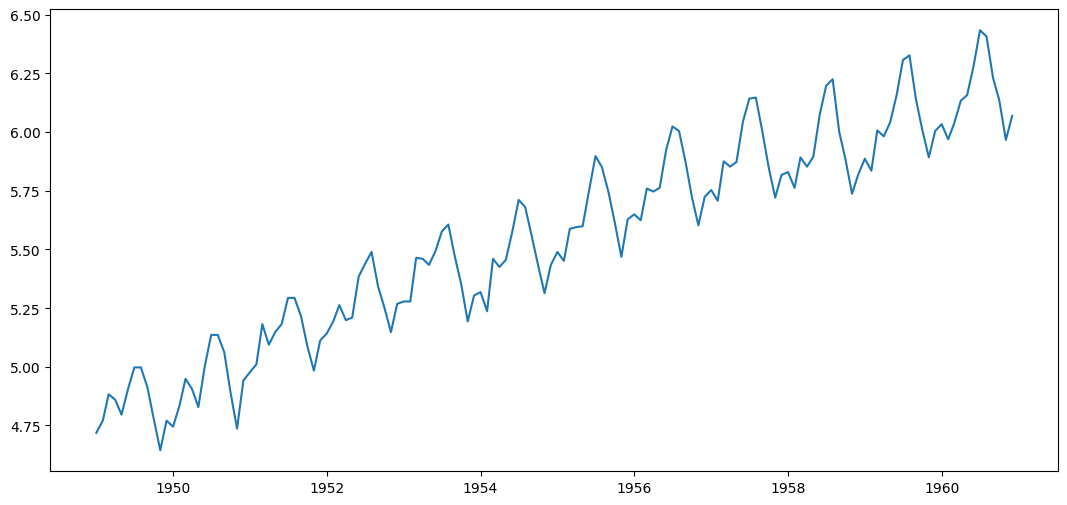

In [21]:
ts_log = np.log(ts2)
plt.plot(ts_log)

In [22]:
# 로그 변환의 효과가 어떠했는지 따져 보기 위해 Augmented Dickey-Fuller Test를 수행해 봅시다.
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


p-value가 0.42로 무려 절반 이상 줄어들었습니다. 정성적으로도 시간 추이에 따른 분산이 일정해진 것을 확인할 수 있습니다.     
아주 효과적인 변환이었던 것 같습니다. 하지만 아직은 갈 길이 멉니다.     
가장 두드러지는 문제점은 시간 추이에 따라 평균이 계속 증가한다는 점입니다.   

## 1-2. Moving average 제거 - 추세(Trend) 상쇄하기
시계열 분석에서 위와 같이 시간 추이에 따라 나타나는 평균값 변화를 추세(trend)라고 합니다. 이 변화량을 제거해 주려면 거꾸로 Moving Average, 즉 rolling mean을 구해서 ts_log에서 빼주면 어떨까요?

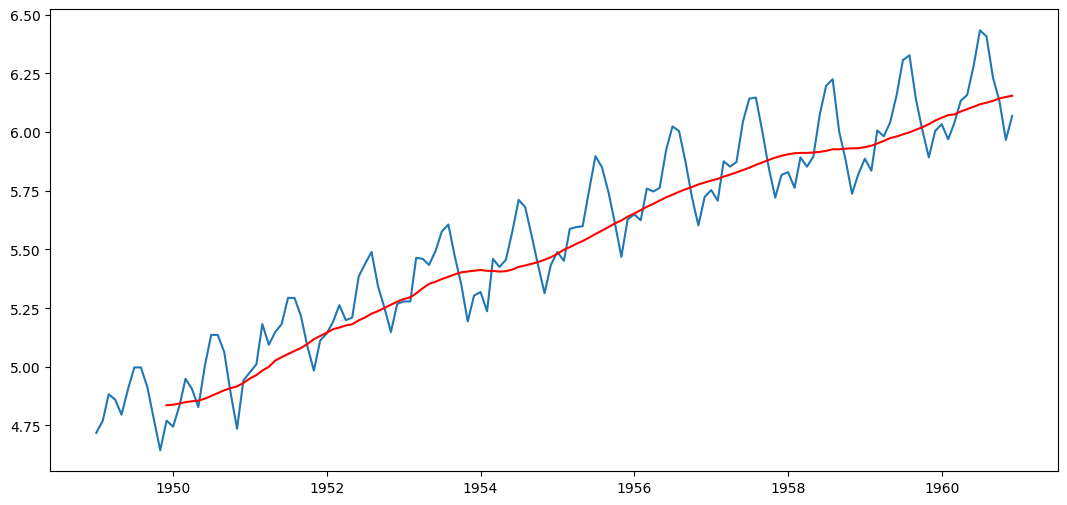

In [23]:
moving_avg = ts_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [24]:
ts_log_moving_avg = ts_log - moving_avg # 변화량 제거
ts_log_moving_avg.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: Passengers, dtype: float64

우리가 관심을 가진 ts_log_moving_avg에 거의 도달했습니다.     
그런데 문제는 Moving Average 계산 시 (windows size=12인 경우) 앞의 11개의 데이터는 Moving Average가    
계산되지 않으므로 ts_log_moving_avg에 결측치(NaN)가 발생한다는 점입니다.    
이 결측치들은 향후 Dicky-Fuller Test 시에 에러를 발생시킬 것이므로 이를 데이터셋에서 제거해 줍니다.

In [25]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
1951-01-01    0.026593
1951-02-01    0.045965
Name: Passengers, dtype: float64

이제 이전 스텝에서 정의했던 메서드들을 활용하여 ts_log_moving_avg를 정성, 정량적으로 분석해 봅시다.

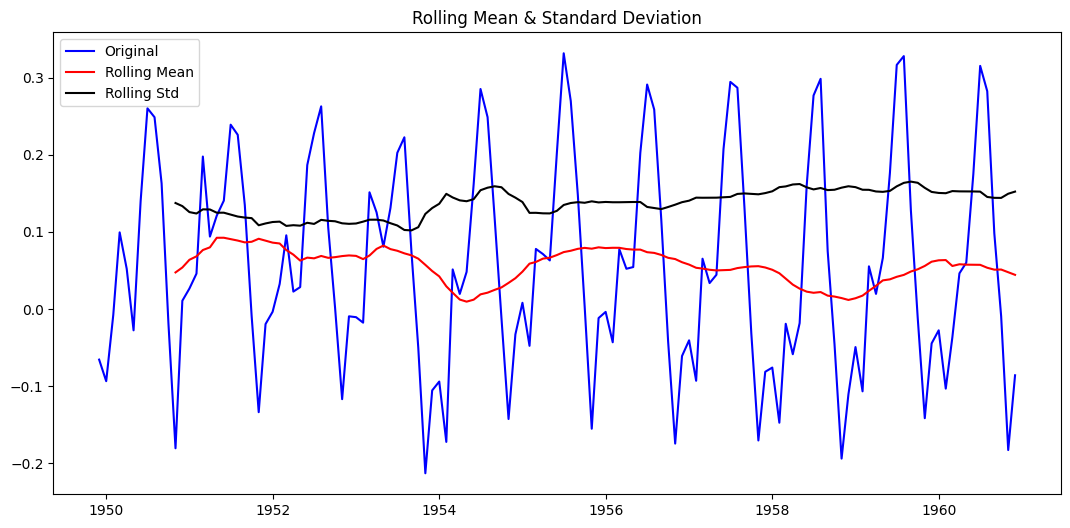

In [26]:
plot_rolling_statistics(ts_log_moving_avg)

In [27]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


드디어 p-value가 0.02 수준이 되었습니다. 95% 이상의 confidence로 이 time series는 stationary하다고 할 수 있겠습니다.

그러나 지금까지의 접근에서 한 가지 숨겨진 문제점이 있습니다.
바로 Moving Average를 계산하는 window=12로 정확하게 지정해 주어야 한다는 점입니다.

만약 위 코드에서 window=6을 적용하면 어떤 결과가 나올까요?

In [28]:
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)
print('슝=3')

슝=3


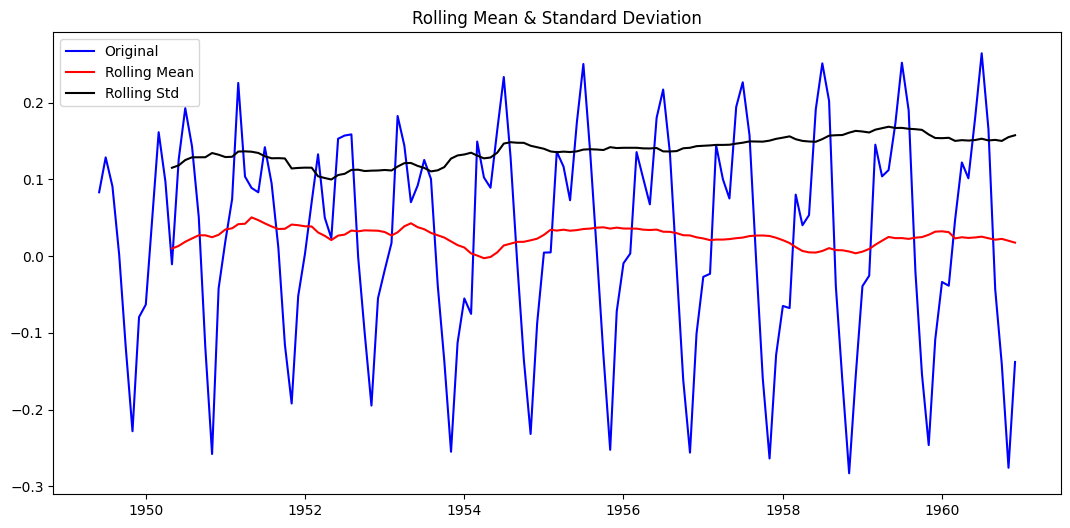

In [29]:
plot_rolling_statistics(ts_log_moving_avg_6)

In [30]:
augmented_dickey_fuller_test(ts_log_moving_avg_6)

Results of Dickey-Fuller Test:
Test Statistic                  -2.273822
p-value                          0.180550
#Lags Used                      14.000000
Number of Observations Used    124.000000
Critical Value (1%)             -3.484220
Critical Value (5%)             -2.885145
Critical Value (10%)            -2.579359
dtype: float64


그래프를 정성적으로 분석해서는 window=12일 때와 별 차이를 느낄 수 없지만 Augmented Dickey-Fuller Test의 결과 p-value는 0.18 수준이어서 아직도 안정적 시계열이라고 말할 수 없게 되었습니다.

이 데이터셋은 월 단위로 발생하는 시계열이므로 12개월 단위로 주기성이 있기 때문에 window=12가 적당하다는 것을 추측할 수도 있을 것 같습니다만, moving average를 고려할 때는 rolling mean을 구하기 위한 window 크기를 결정하는 것이 매우 중요하다는 것을 기억해 둡시다.

이제 시간의 추이에 따라 평균이 증가하는 trend를 제거하였습니다. 그러나 여전히 안정적인 시계열이라고 하기에는 마음에 걸리는 부분이 있습니다.

## 1-3. 차분(Differencing) - 계절성(Seasonality) 상쇄하기
    
Trend에는 잡히지 않지만 시계열 데이터 안에 포함된 패턴이 파악되지 않은 주기적 변화는 예측에 방해가 되는 불안정성 요소입니다. 이것은 Moving Average 제거로는 상쇄되지 않는 효과입니다. 이런 계절적, 주기적 패턴을 계절성(Seasonality)라고 합니다.

1. 추세 (Trend)
* 장기적으로 증가하거나, 감소하는 경향성이 존재하는 것을 의미합니다.
* 주로 시계열에서 기울기가 증가하거나 감소할 때 관찰됩니다.
* 일정 시간 발생했다가 사라지고 반복되지 않습니다.

2. 계절성 (Seasonality)
* 계절적 요인의 영향을 받아 1년, 혹은 일정 기간 안에 반복적으로 나타나는 패턴을 의미합니다.
* 빈도의 형태로 나타나며 항상 일정한 경우가 많습니다.

3. 주기성 (Cycle)
* 정해지지 않은 빈도, 기간으로 일어나는 상승 혹은 하락을 의미합니다. (주기성은 학자마다 조금씩 정의가 다르니, 참고로만 알아 두시길 바랍니다)

이런 패턴을 상쇄하기 위해 효과적인 방법에는 차분(Differencing)이 있습니다. 마치 미분(Differentiation)을 떠올리게 하는 개념인데요, 시계열을 한 스텝 앞으로 시프트한 시계열을 원래 시계열에 빼 주는 방법입니다. 이렇게 되면 남은 것은 현재 스텝 값 - 직전 스텝 값이 되어 정확히 이번 스텝에서 발생한 변화량을 의미하게 됩니다. 이 변화량 시계열은 어떤 패턴을 보이게 될까요?

우선 시프트한 시계열과 원본 시계열에 대한 그래프를 그려봅시다.

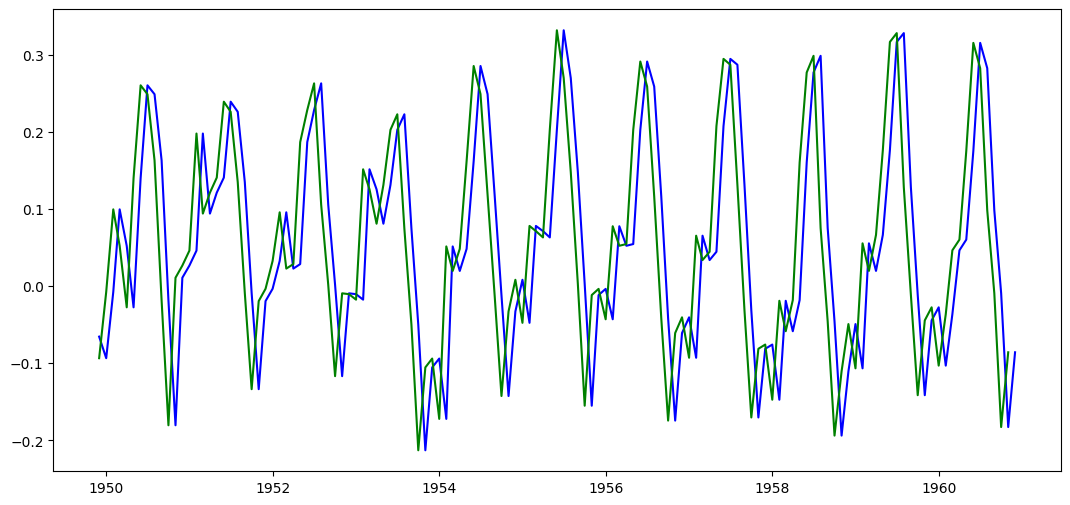

In [31]:
ts_log_moving_avg_shift = ts_log_moving_avg.shift(-1)

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

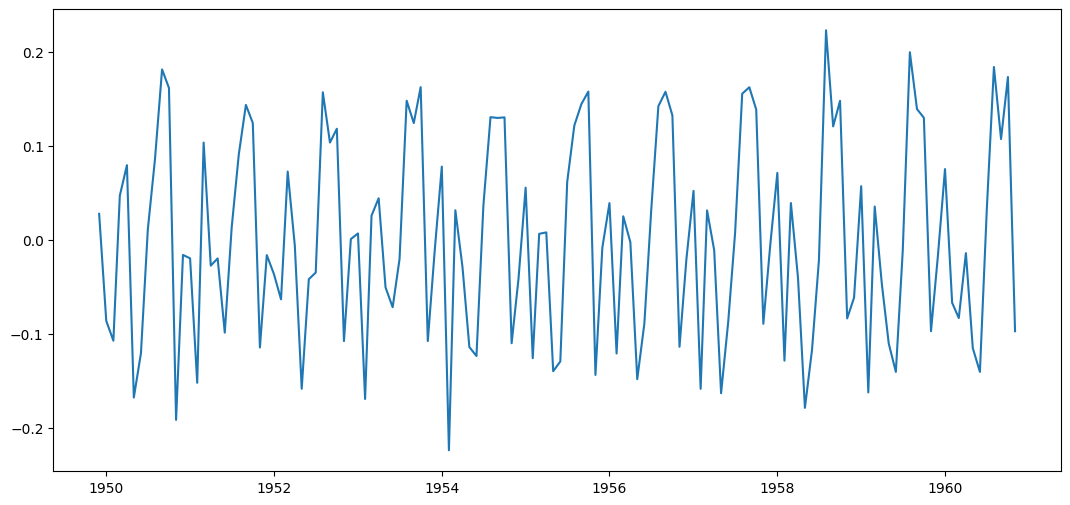

In [32]:
# 원본 시계열에서 시프트한 시계열을 뺀 값을 그래프로 표현해 봅시다.
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

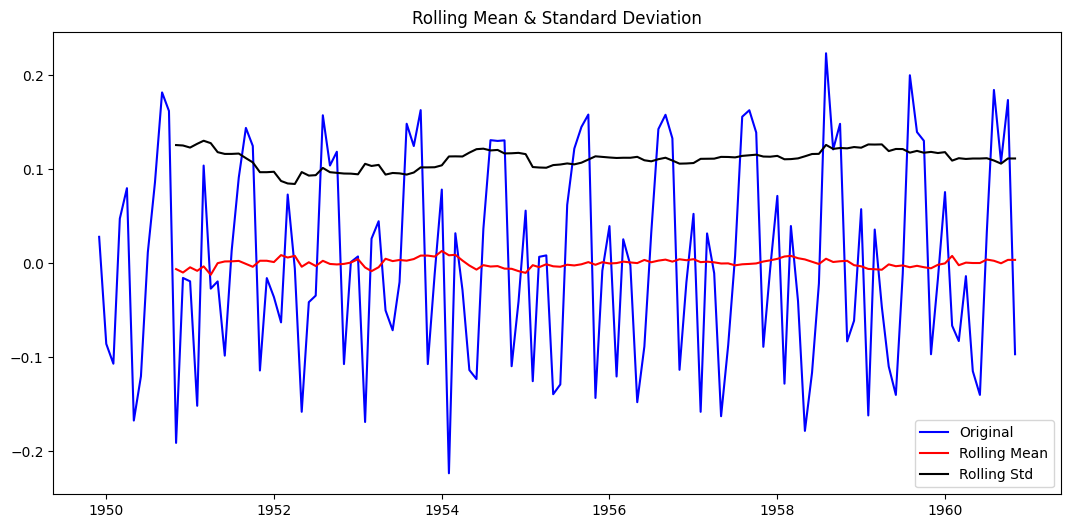

In [33]:
# 이동평균과, 이동표준편차를 그래프에 나타내어 정성적으로 안정성(stationary) 여부를 파악해 봅시다.
plot_rolling_statistics(ts_log_moving_avg_diff)

In [34]:
# 차분의 효과가 어떠했는지 알아보기 위해 Augmented Dickey-Fuller Test를 수행해 봅시다.
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -3.912981
p-value                          0.001941
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


이동평균을 빼 주어 추세(Trend)를 제거하고 난 시계열에다가 1차 차분(1st order differencing)을 적용하여 Seasonality 효과를 다소 상쇄한 결과, p-value가 약 0.022 에서 0.0019로 1/10 정도로 줄었습니다.

데이터에 따라서는 2차 차분(2nd order differencing, 차분의 차분), 3차 차분(3rd order differencing, 2차 차분의 차분)을 적용하면 더욱 p-value를 낮출 수 있을지도 모릅니다.

## 2. 시계열 분해(Time series decomposition)

statsmodels 라이브러리 안에는 seasonal_decompose 메서드를 통해 시계열 안에 존재하는 trend, seasonality를 직접 분리해 낼 수 있는 기능이 있습니다. 이 기능을 활용하면 우리가 위에서 직접 수행했던 moving average 제거, differencing 등을 거치지 않고도 훨씬 안정적인 시계열을 분리해 낼 수 있게 됩니다. 이번에는 위에서 구했던 로그 변환 단계(ts_log)에서부터 출발해 봅시다.

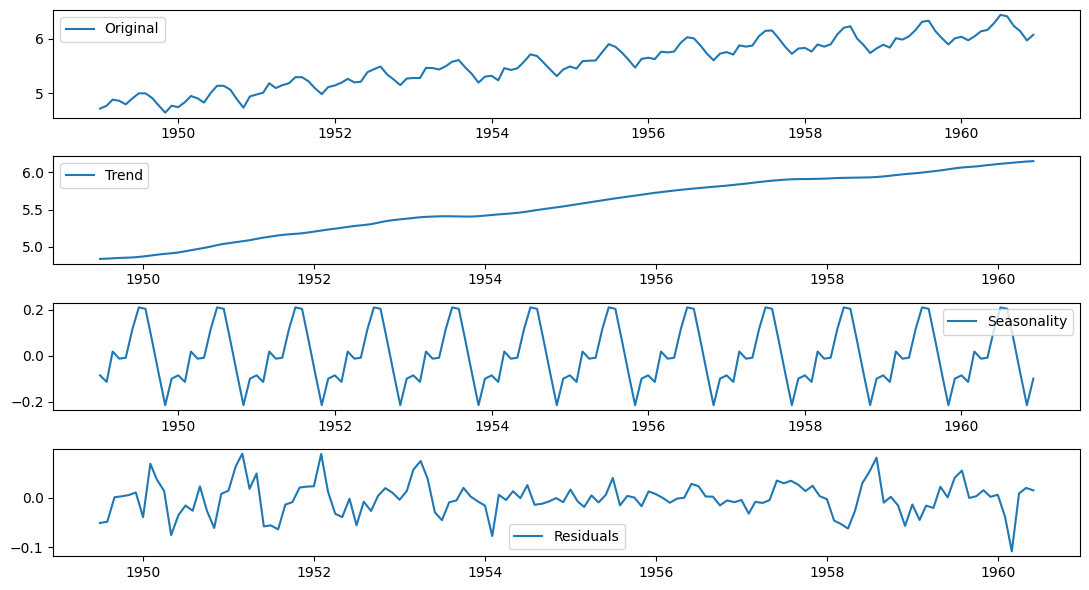

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Original 시계열에서 Trend와 Seasonality를 제거하고 난 나머지를 Residual이라고 합니다. 뒤집어서 말하면 Trend+Seasonality+Residual=Original 이 성립한다는 뜻입니다. 이러한 Decomposing은 시계열 데이터를 이해하는 중요한 관점을 제시해 줍니다.

그렇다면 이제 Residual에 대해 안정성 여부를 따져 봅시다.

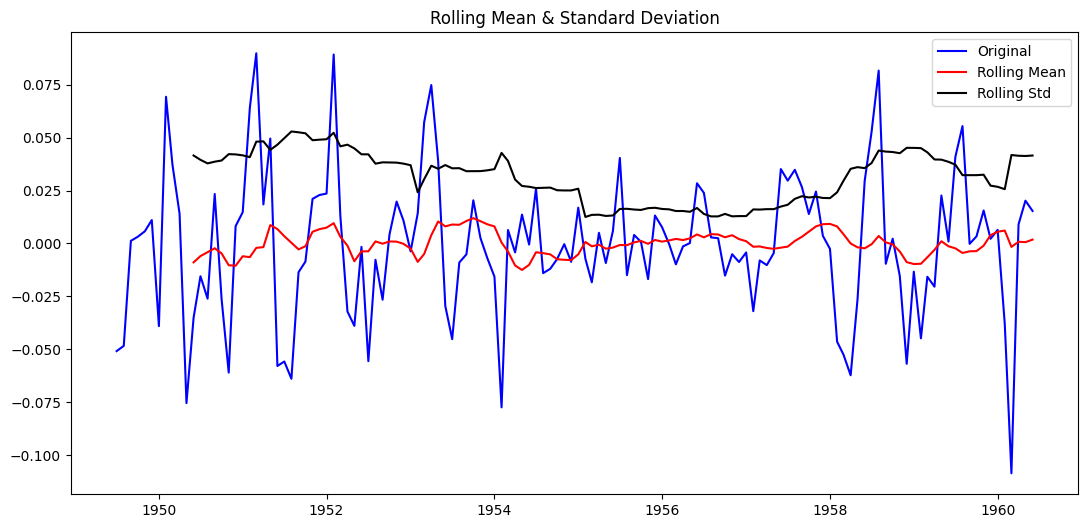

In [36]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [37]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


Decomposing을 통해 얻어진 Residual은 압도적으로 낮은 p-value를 보여 줍니다. 이 정도면 확실히 예측 가능한 수준의 안정적인 시계열이 얻어졌다고 볼 수 있겠습니다. 어쩌면 굳이 애써 직접 Trend, Seasonality를 제거하려고 애쓸 필요가 없이 바로 Time Series Decomposing을 시도하는 게 더 낫지 않았을까요? 물론 그렇긴 합니다만, 이렇게 Trend와 Seasonality를 제거해 주는 것이 어떤 효과를 발휘하게 되는지를 단계적으로 확인하는 과정이었다고 이해해 주시면 좋겠습니다.

# 7. ARIMA 모델의 개념

## 1. ARIMA 모델의 정의

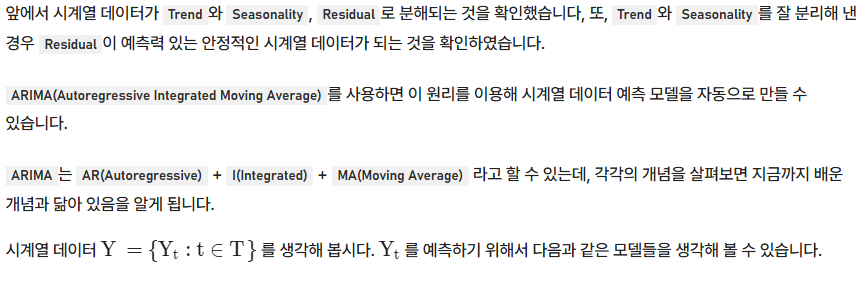

### 1-1. AR(자기회귀, Autoregressive)

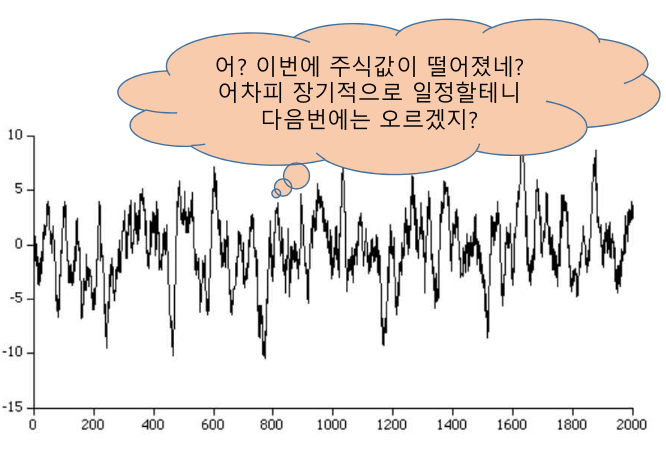

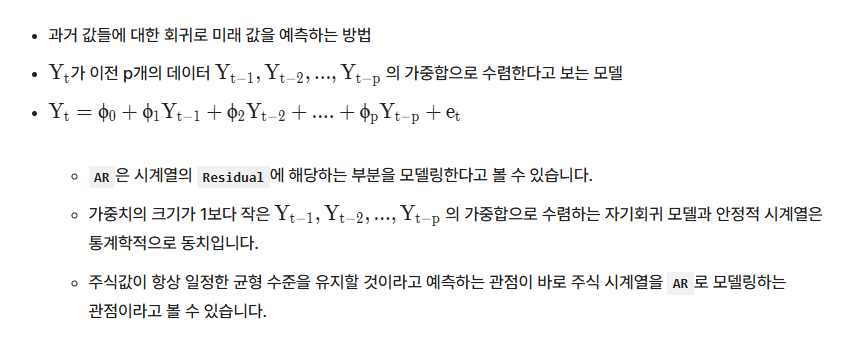

### 1-2. MA(이동평균, Moving Average)
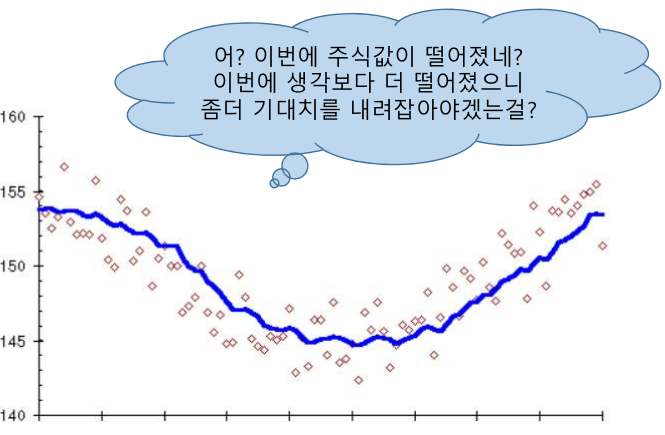

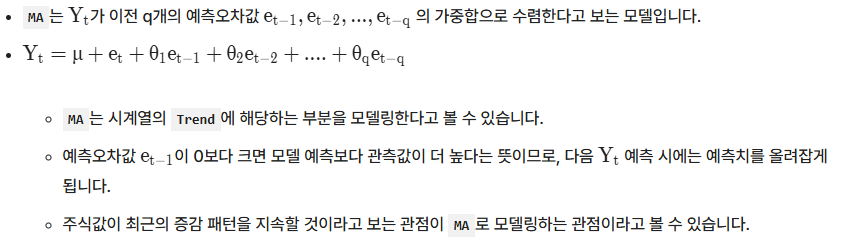


### 1-3. I(차분 누적, Integration)
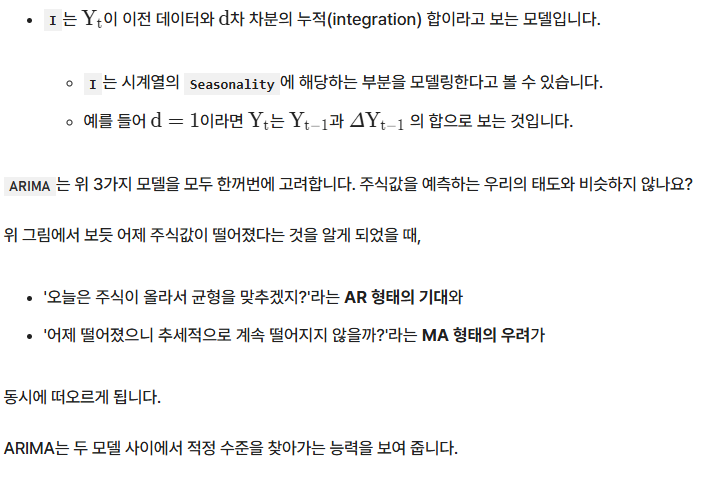

## 2. ARIMA 모델의 모수 p, q, d

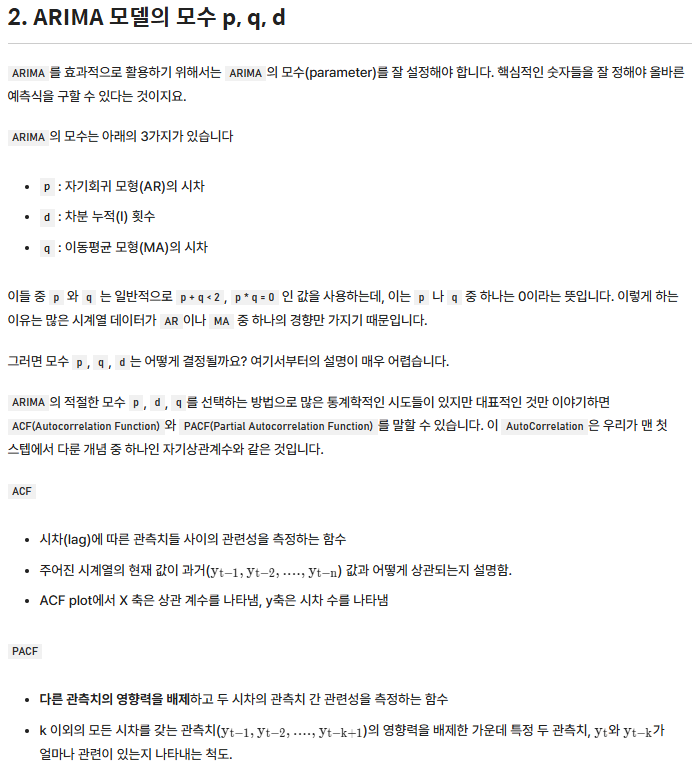

참고자료

* 자기상관함수 및 편자기상관함수 : https://www.ibm.com/docs/ko/spss-modeler/saas?topic=data-autocorrelation-partial-autocorrelation-functions
* A Gentle Introduction to Autocorrelation and Partial Autocorrelation : https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

지난 스텝에서 다루었던 International airline passengers 시계열을 예시를 들어 설명하겠습니다.     
우리는 statsmodels에서 제공하는 ACF와 PACF 플로팅 기능을 사용할 것입니다.

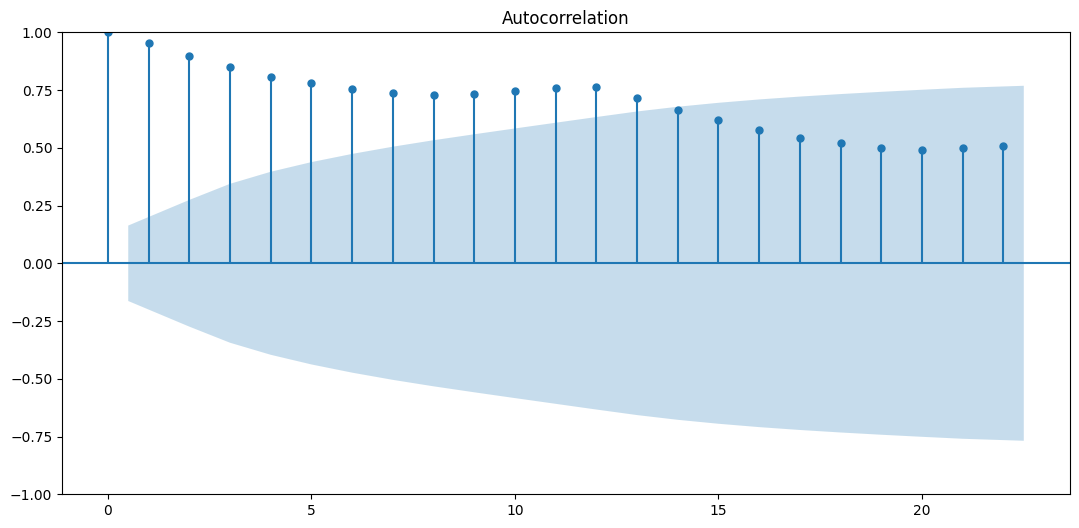

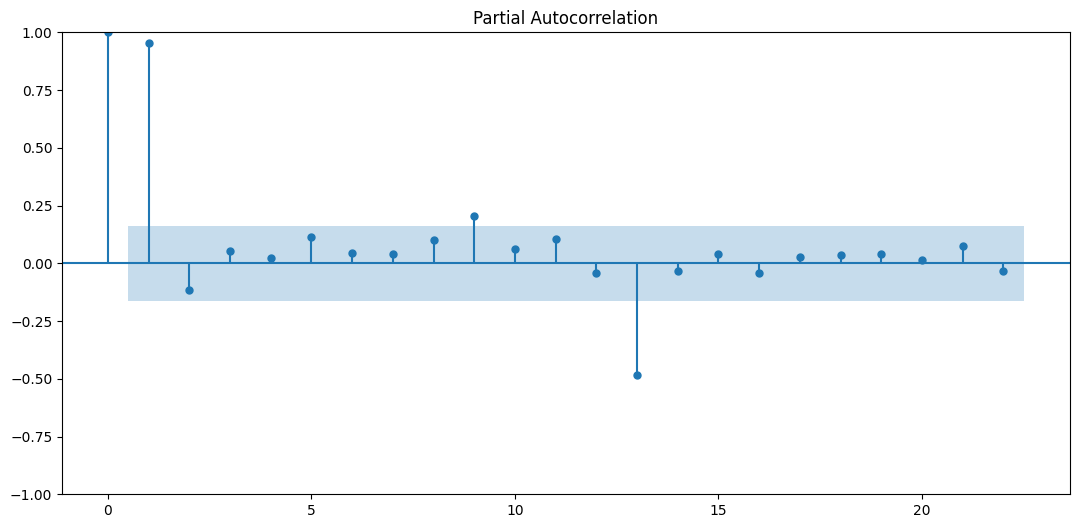

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

아래 그림은 ACF를 통해 MA 모델의 시차 q를 결정하고, PACF를 통해 AR 모델의 시차 p를 결정할 수 있음을 통계학적으로 설명하는 아티클에서 요약 결론 부분만 가져온 것입니다.

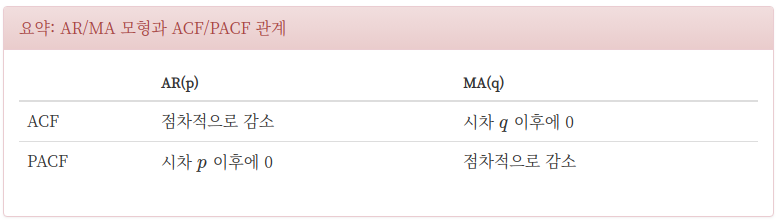

이 결론에 따라 보자면 PACF 그래프를 볼 때 p=1이 매우 적합한 것 같습니다. p가 2 이상인 구간에서 PACF는 거의 0에 가까워지고 있기 때문입니다. PACF가 0이라는 의미는 현재 데이터와 p 시점 떨어진 이전의 데이터는 상관도가 0, 즉 아무 상관 없는 데이터이기 때문에 고려할 필요가 없다는 뜻입니다.
반면 ACF는 점차적으로 감소하고 있어서 AR(1) 모델에 유사한 형태를 보이고 있습니다. q에 대해서는 적합한 값이 없어 보입니다. MA를 고려할 필요가 없다면 q=0으로 둘 수 있습니다. 하지만 q를 바꿔 가면서 확인해 보는 것도 좋겠습니다.    
    
d를 구하기 위해서는 좀 다른 접근이 필요합니다. d차 차분을 구해 보고 이때 시계열이 안정된 상태인지를 확인해 보아야 합니다.

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


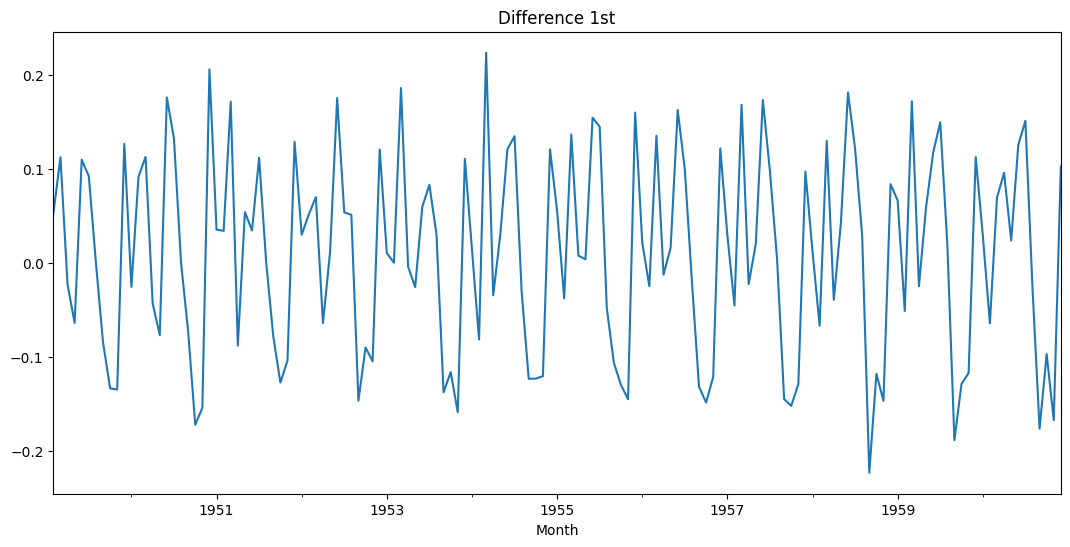

In [39]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


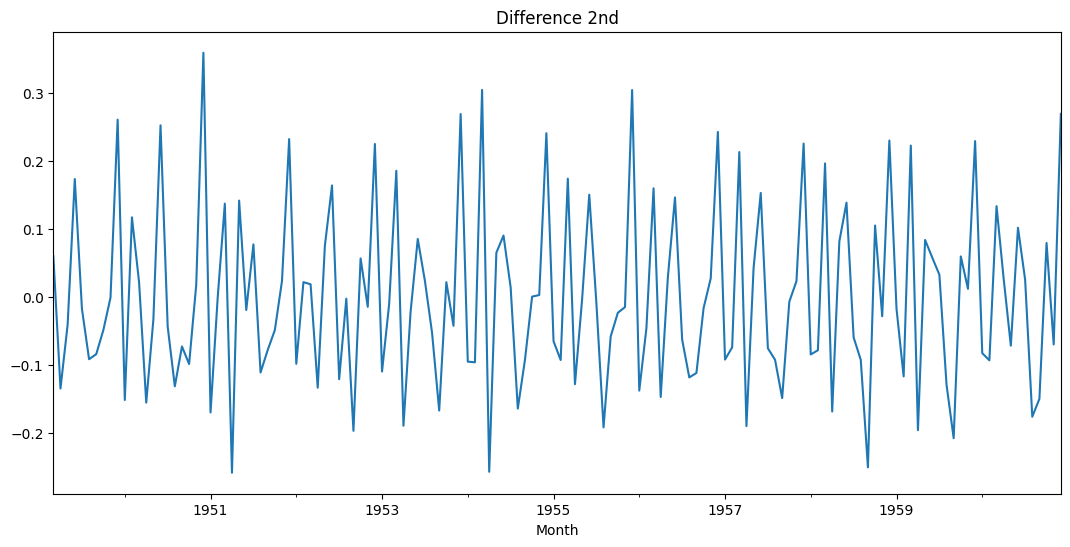

In [40]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

이번 경우에는 1차 차분을 구했을 때 약간 애매한 수준의 안정화 상태를 보였습니다.     
2차 차분을 구했을 때는 확실히 안정화 상태였지만 이번 경우에는 d=1로 먼저 시도해 볼 수 있을 것 같습니다.     
d 값도 바꿔 가면서 최적의 값을 찾아보기를 권합니다.

## 3. 학습 데이터 분리

아래와 같이 시계열 데이터에서 학습 데이터와 테스트 데이터를 분리해 봅시다. 분리 비율은 학습과 테스트에 9:1로 하겠습니다. 시계열 예측이니만큼 가장 나중 데이터를 테스트용으로 사용하는 것이 타당할 것입니다.

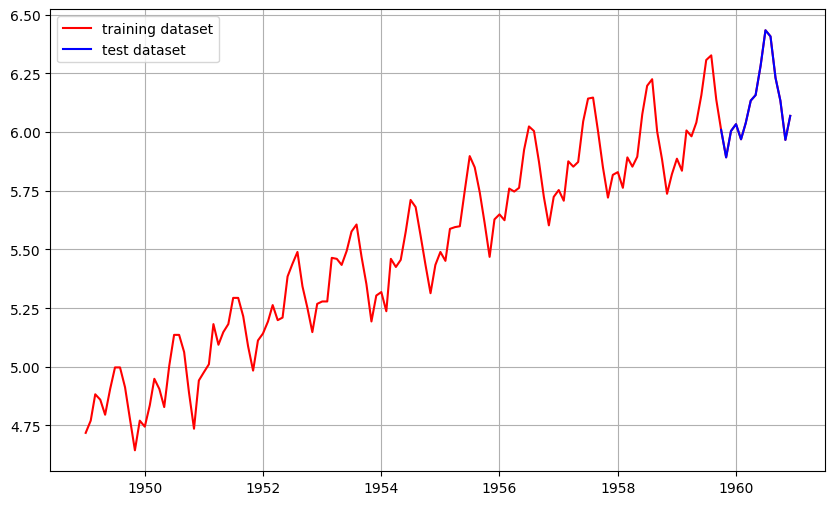

In [41]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [42]:
# 아래와 같이 데이터셋의 형태를 확인해 봅시다.
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Month
1949-01-01    4.718499
1949-02-01    4.770685
Name: Passengers, dtype: float64
(129,)
(15,)


# 8. ARIMA 모델 훈련과 추론

ARIMA 모델을 훈련하는 것은 아래와 같이 간단합니다.






In [43]:
import warnings
warnings.filterwarnings('ignore') #경고 무시

from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(14, 1, 0)) # 모수는 이전 그래프를 참고 
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  129
Model:                ARIMA(14, 1, 0)   Log Likelihood                 219.959
Date:                Wed, 27 Aug 2025   AIC                           -409.918
Time:                        14:28:57   BIC                           -367.138
Sample:                    01-01-1949   HQIC                          -392.536
                         - 09-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2761      0.081     -3.395      0.001      -0.435      -0.117
ar.L2         -0.0133      0.109     -0.122      0.903      -0.226       0.199
ar.L3         -0.0021      0.046     -0.046      0.9

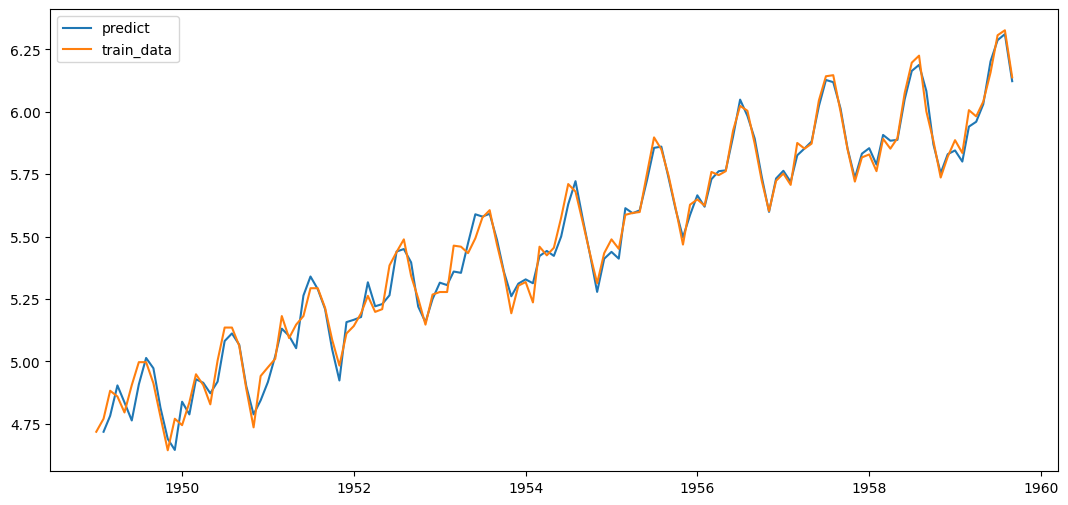

In [44]:
# ARIMA 모델이 훈련 결과를 시각적으로 확인해 보겠습니다.
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

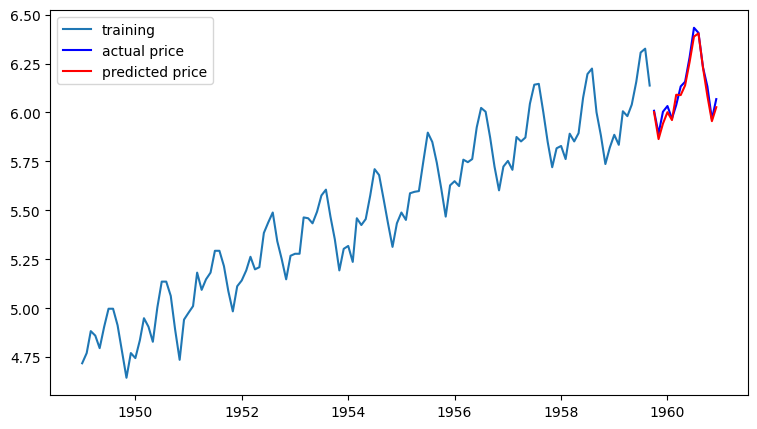

In [45]:
# forecast() 메소드를 이용해 테스트 데이터 구간의 데이터를 예측해 봅니다.

model = ARIMA(train_data, order=(14, 1, 0))  # p값을 14으로 테스트
fitted_m = model.fit() 
fc= fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

시계열 데이터를 로그 변환하여 사용했으므로 다시 지수 변환해야 정확한 오차를 계산할 수 있습니다.     
np.exp()를 통해 전부 원본 스케일로 돌린 후 MSE, MAE, RMSE, MAPE를 계산합니다.

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  236.35806490615238
MAE:  12.62544831628575
RMSE:  15.373941098695298
MAPE: 2.78%


종적으로 예측 모델의 메트릭으로 활용하기에 적당한 MAPE 기준으로 10% 정도의 오차율을 보입니다.      
썩 만족스럽지 않은데, 더 적당한 모수를 찾을 수 있다면 개선의 여지가 있을지 모르겠습니다.     
p=14을 줄 경우 MAPE가 2% 정도로 내려갑니다.    
조금 더 다양한 테스트를 거쳐 최적화된 모델을 만들어 보시면 좋을것 같습니다.    
    
MAPE : https://en.wikipedia.org/wiki/Mean_absolute_percentage_error